In [112]:
%matplotlib inline
import PIL as PIL

import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import filters
from skimage import data,exposure,color,restoration
from skimage.morphology import disk
from skimage.filters.rank import median
im4 = PIL.Image.open('input4.bmp')
im4 = np.asarray(im4)
plt.rcParams["figure.figsize"] = [16,9]

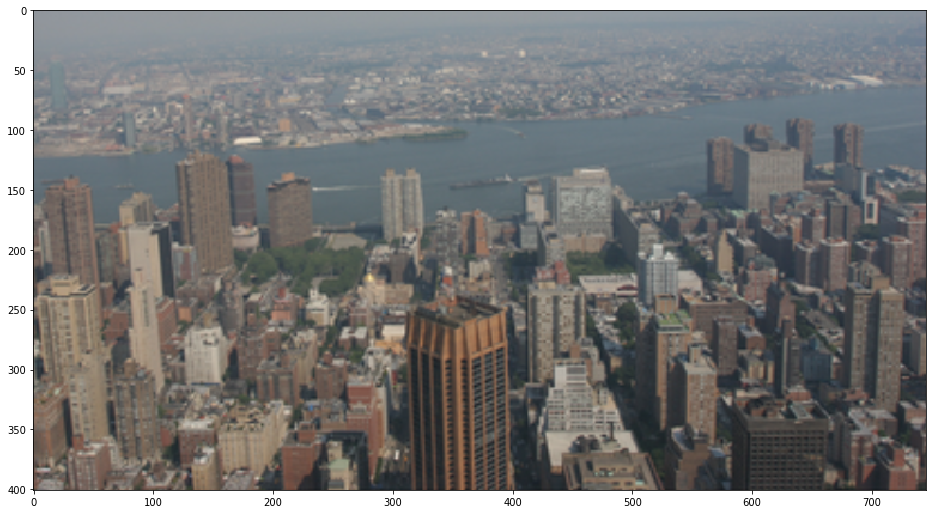

In [113]:
plt.imshow(im4)
plt.show()

In [146]:
def darkchannl(image,windowsize=(11,11)):
    White = [255,255,255]
    padwidth = windowsize[0]//2
    image_pad = cv2.copyMakeBorder(image,padwidth,padwidth,padwidth,padwidth,cv2.BORDER_CONSTANT,value=White)
    J_dark = np.zeros((image.shape[0],image.shape[1]))
    min_RGB = np.amin(image_pad,axis=2)
    for i in range(J_dark.shape[0]):
        for j in range(J_dark.shape[1]):
            J_dark[i][j] = np.min(min_RGB[i:i+windowsize[0],j:j+windowsize[1]].flatten())
    return J_dark
    plt.imshow(J_dark)
    plt.gray()
    plt.show()
def atmosphere(image, image_dark,ratio):
    image = image.reshape([-1, 3])
    image_dark = image_dark.flatten()
    top_k_index = np.argsort(image_dark)[-int(image_dark.size * ratio):]
    return np.mean(np.take(image, top_k_index, axis=0), axis=0)
def transmission(image,A,omaga):
    return 1.0-omaga*darkchannl(image/A)

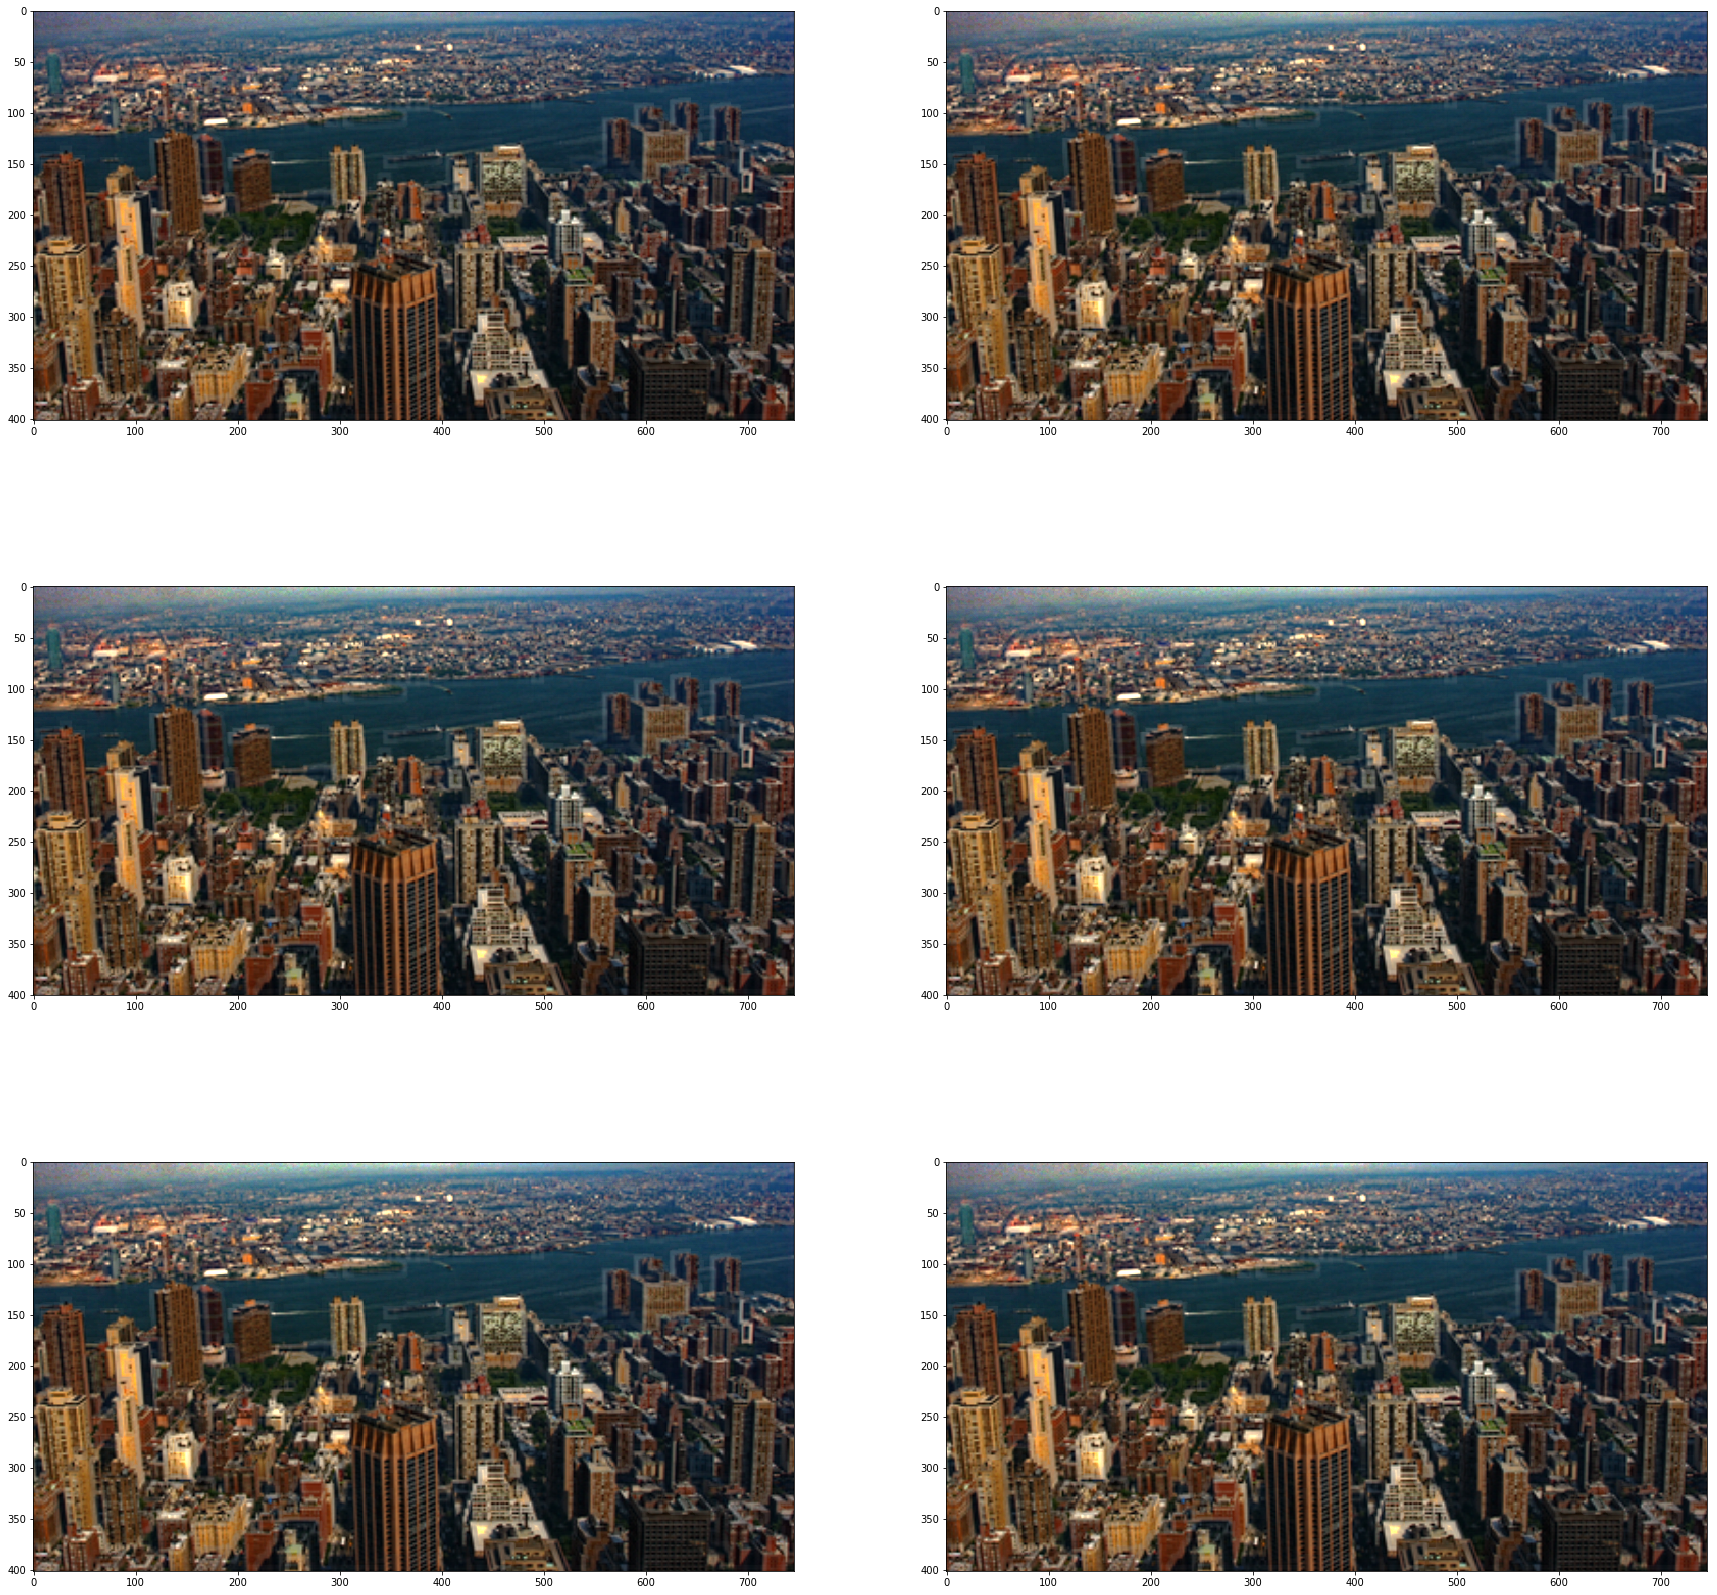

In [150]:
f,ax = plt.subplots(3,2,figsize=(30, 30))

for i in range(6):
    image_dark = darkchannl(im4,(7+8*i,7+8*i))
    A = atmosphere(im4,image_dark,0.01)
    t = transmission(im4,A.astype(np.float32),1)
    T = np.dstack([t,t,t])

    dehaze_im = (im4.astype(np.int)-A.astype(np.float32))/T+A
    dehaze_im[dehaze_im<0] = 0
    dehaze_im[dehaze_im>255] = 255
    ax[i//2][i%2].imshow(dehaze_im.astype(np.uint8))
    o = PIL.Image.fromarray(dehaze_im.astype(np.uint8))
    o.save('windows'+str(i)+'.jpg')
f.show()

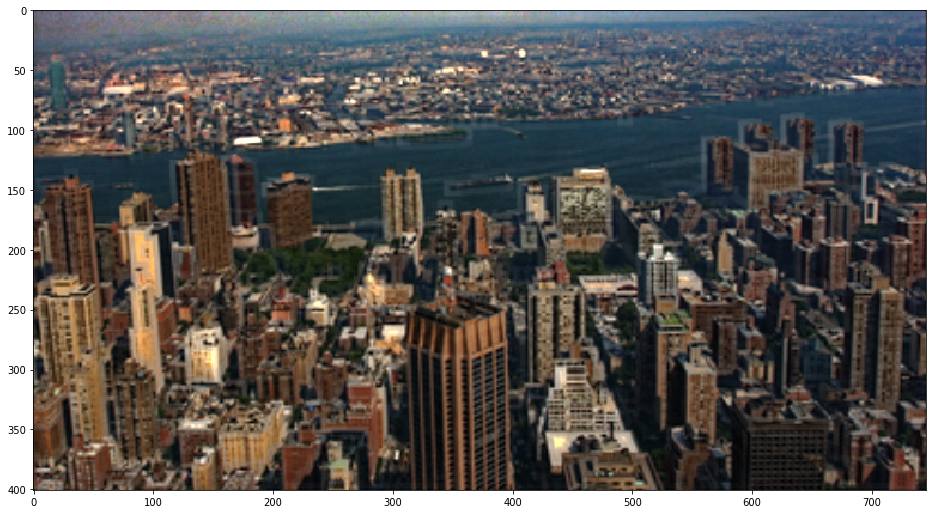

In [159]:
image_dark = darkchannl(im4,(11,11))
A = atmosphere(im4,image_dark,0.01)
t = transmission(im4,A.astype(np.float32),0.95)
T = np.dstack([t,t,t])
dehaze_im = (im4.astype(np.int)-A.astype(np.float32))/T+A
dehaze_im[dehaze_im<0] = 0
dehaze_im[dehaze_im>255] = 255
dehaze_im = dehaze_im.astype(np.uint8)
dehaze_im_hsv = color.rgb2hsv(dehaze_im)

# 降低飽和度
dehaze_im_hsv[:,:,1] *= 0.8
dehaze_im = color.hsv2rgb(dehaze_im_hsv)
plt.imshow(dehaze_im)
plt.show()